*2024/11/12*
***

**从这里开始加入英文版的d2l（代码部分）**

# 多层感知机
## 1 多层感知机的实现
### 1.1 从零开始实现

使用Fashion-MNIST图像分类数据集

In [16]:
import torch
from torch import nn
from d2l import torch as d2l

#### 1 初始化模型参数

Fashion-MNIST中的每个图像由$28 \times 28 = 784$个灰度像素值组成。所有图像共分为10个类别。

忽略像素之间的空间结构，我们可以将每个图像视为具有784个输入特征和10个类的简单分类数据集。

首先，将[**实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元**]。注意，我们可以将这两个变量都视为超参数。通常，我们选择**2的若干次幂**作为层的宽度。因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

对于每一层都要记录一个权重矩阵和一个偏置向量。要为损失关于这些参数的梯度分配内存。

In [17]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 2 模型

In [18]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

@d2l.add_to_class(MLPScratch)

def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### 3 训练

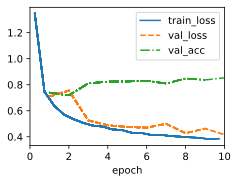

In [19]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 1.2 简洁实现
#### 1 模型


In [20]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

#### 2 训练

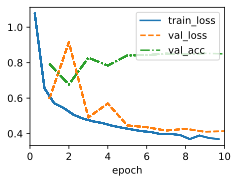

In [21]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)